# PCA & Feature Engineering 

- Bank Customer Churn Dataset

In [1]:
# pip install pandas numpy scikit-learn

### Step 1: Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Step 2: Load the dataset


In [3]:
data = pd.read_csv("bank_customer_churn.csv")


### Step 3: Data Preprocessing


In [4]:
# Drop unnecessary columns (e.g., customer ID, row number, surname)
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

### Step 4: Handle Categorical Variables (e.g., one-hot encoding)

In [5]:
data = pd.get_dummies(data, columns=["Geography", "Gender"], drop_first=True)


### Step 5: Data Visualization (Optional)

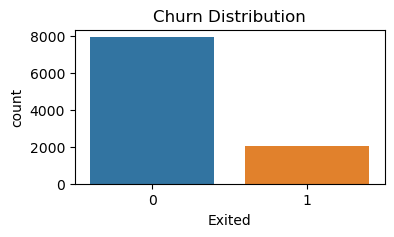

In [6]:
plt.figure(figsize=(4, 2))
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution')
plt.show()

### Step 6: Split the dataset into features (X) and target (y)

In [7]:
X = data.drop(columns=["Exited"])
y = data["Exited"]

### Step 7: Standardize the data

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 8: Dimensionality Reduction using PCA

In [9]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

### Step 9: Feature Engineering (Example: SelectKBest using ANOVA F-statistic)

In [10]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

### Step 10: Train-test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Step 11: Train a Model (Random Forest, for example)

In [12]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 12: Evaluate the Model

In [13]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86
